In [11]:
!wget http://yann.lecun.com/exdb/mnist/
!git clone https://github.com/keras-team/keras-tuner.git

--2020-06-12 20:19:37--  http://yann.lecun.com/exdb/mnist/
Resolving yann.lecun.com (yann.lecun.com)... 104.28.7.204, 104.28.6.204, 172.67.171.76, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.7.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [ <=>                ]  28.49K  --.-KB/s    in 0s      

2020-06-12 20:19:37 (348 MB/s) - ‘index.html’ saved [29175]

Cloning into 'keras-tuner'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 6441 (delta 17), reused 18 (delta 10), pack-reused 6402
Receiving objects: 100% (6441/6441), 2.01 MiB | 2.14 MiB/s, done.
Resolving deltas: 100% (4495/4495), done.


In [12]:
%cd keras-tuner
!pip install .

/content/keras-tuner/keras-tuner/keras-tuner
Processing /content/keras-tuner/keras-tuner/keras-tuner
  Created wheel for keras-tuner: filename=keras_tuner-1.0.0-cp36-none-any.whl size=88924 sha256=aa4a7a8502f13e2dfd502bd76a7edb4edc01fc4afbe8257a31060f39284e0773
  Stored in directory: /root/.cache/pip/wheels/db/38/2f/c17c30a93ab9ad97cd5811ffe2286aab937a4ac7bf86d24192
Successfully built keras-tuner
  Found existing installation: keras-tuner 1.0.0
    Uninstalling keras-tuner-1.0.0:
      Successfully uninstalled keras-tuner-1.0.0


In [0]:
from keras.datasets                 import mnist 
from tensorflow.keras.models        import Sequential,load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers        import Dense
from tensorflow.keras.callbacks     import EarlyStopping
from tensorflow.keras               import utils
from kerastuner.tuners              import RandomSearch, Hyperband, BayesianOptimization
from google.colab                   import files
from random                         import randint
from PIL                            import Image
import matplotlib.pyplot as plt
import numpy as np


In [14]:
# Download data
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

x_train = x_train.reshape(60000,784)
x_train = x_train / 255

x_test  = x_test.reshape(10000,784)
x_test  = x_test  / 255

y_train = utils.to_categorical(y_train,10)
y_test  = utils.to_categorical(y_test,10)


11493376/11490434 [==============================] - 2s 0us/step


In [0]:
def build_model(hp):
    model = Sequential()
    activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])    
    model.add(Dense(units=hp.Int('units_input',    # Fully connected layer, with different amount of neurons
                                   min_value=128,  # The minimum amount of neurons - 128
                                   max_value=1024, # The max amount of neurons - 1024
                                   step=32),
                    input_dim=784,
                    activation=activation_choice))
    model.add(Dense(units=hp.Int('units_hidden',        
                                   min_value=128,   
                                   max_value=600,   
                                   step=32),
                    activation=activation_choice))   
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model
    

In [0]:
# BayesianOptimization
tuner = BayesianOptimization (
    build_model,                 # Create model
    objective='val_accuracy',    # Metric
                              
    max_trials=7,               # max amount of training launches 
    directory='test_directory'   # catalogue  
    
)

In [17]:
tuner.search_space_summary()

In [0]:
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=2)

In [19]:
tuner.search(x_train,        # Data for training
             y_train,                  # Right answers
             batch_size=256,           # mini picks
             epochs=10,                 # amount of epochs 
             validation_split=0.2,     # Checking data
             callbacks=[early_stopping_callback]
             )

Epoch 1/10
188/188 [==============================] - 7s 37ms/step - loss: 0.2978 - accuracy: 0.9079 - val_loss: 0.1397 - val_accuracy: 0.9552
Epoch 2/10
188/188 [==============================] - 7s 37ms/step - loss: 0.0999 - accuracy: 0.9698 - val_loss: 0.1101 - val_accuracy: 0.9643
Epoch 3/10
188/188 [==============================] - 7s 36ms/step - loss: 0.0611 - accuracy: 0.9813 - val_loss: 0.1337 - val_accuracy: 0.9617
Epoch 4/10
188/188 [==============================] - 7s 37ms/step - loss: 0.0422 - accuracy: 0.9866 - val_loss: 0.1013 - val_accuracy: 0.9726
Epoch 5/10
188/188 [==============================] - 7s 36ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0928 - val_accuracy: 0.9764
Epoch 6/10
188/188 [==============================] - 7s 36ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0970 - val_accuracy: 0.9753
Epoch 7/10
188/188 [==============================] - 7s 36ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0941 - val_accuracy: 0.9791

Epoch 1/10
188/188 [==============================] - 7s 39ms/step - loss: 0.6674 - accuracy: 0.8183 - val_loss: 0.2951 - val_accuracy: 0.9153
Epoch 2/10
188/188 [==============================] - 7s 38ms/step - loss: 0.2776 - accuracy: 0.9181 - val_loss: 0.2288 - val_accuracy: 0.9323
Epoch 3/10
188/188 [==============================] - 7s 38ms/step - loss: 0.2264 - accuracy: 0.9329 - val_loss: 0.1991 - val_accuracy: 0.9425
Epoch 4/10
188/188 [==============================] - 7s 38ms/step - loss: 0.1846 - accuracy: 0.9449 - val_loss: 0.1711 - val_accuracy: 0.9517
Epoch 5/10
188/188 [==============================] - 7s 38ms/step - loss: 0.1550 - accuracy: 0.9534 - val_loss: 0.1510 - val_accuracy: 0.9565
Epoch 6/10
188/188 [==============================] - 7s 38ms/step - loss: 0.1323 - accuracy: 0.9603 - val_loss: 0.1356 - val_accuracy: 0.9605
Epoch 7/10
188/188 [==============================] - 7s 37ms/step - loss: 0.1110 - accuracy: 0.9667 - val_loss: 0.1308 - val_accuracy: 0.9601

Epoch 1/10
188/188 [==============================] - 3s 16ms/step - loss: 0.8882 - accuracy: 0.7599 - val_loss: 0.4954 - val_accuracy: 0.8752
Epoch 2/10
188/188 [==============================] - 3s 16ms/step - loss: 0.4659 - accuracy: 0.8749 - val_loss: 0.3970 - val_accuracy: 0.8956
Epoch 3/10
188/188 [==============================] - 3s 16ms/step - loss: 0.3981 - accuracy: 0.8902 - val_loss: 0.3572 - val_accuracy: 0.9034
Epoch 4/10
188/188 [==============================] - 3s 15ms/step - loss: 0.3649 - accuracy: 0.8983 - val_loss: 0.3339 - val_accuracy: 0.9092
Epoch 5/10
188/188 [==============================] - 3s 16ms/step - loss: 0.3437 - accuracy: 0.9039 - val_loss: 0.3191 - val_accuracy: 0.9122
Epoch 6/10
188/188 [==============================] - 3s 16ms/step - loss: 0.3285 - accuracy: 0.9076 - val_loss: 0.3072 - val_accuracy: 0.9154
Epoch 7/10
188/188 [==============================] - 3s 16ms/step - loss: 0.3165 - accuracy: 0.9114 - val_loss: 0.2986 - val_accuracy: 0.9171

Epoch 1/10
188/188 [==============================] - 2s 12ms/step - loss: 0.3949 - accuracy: 0.8885 - val_loss: 0.1759 - val_accuracy: 0.9486
Epoch 2/10
188/188 [==============================] - 2s 12ms/step - loss: 0.1515 - accuracy: 0.9553 - val_loss: 0.1288 - val_accuracy: 0.9622
Epoch 3/10
188/188 [==============================] - 2s 12ms/step - loss: 0.0993 - accuracy: 0.9696 - val_loss: 0.1214 - val_accuracy: 0.9615
Epoch 4/10
188/188 [==============================] - 2s 12ms/step - loss: 0.0755 - accuracy: 0.9768 - val_loss: 0.1117 - val_accuracy: 0.9670
Epoch 5/10
188/188 [==============================] - 2s 12ms/step - loss: 0.0577 - accuracy: 0.9826 - val_loss: 0.1015 - val_accuracy: 0.9704
Epoch 6/10
188/188 [==============================] - 2s 12ms/step - loss: 0.0437 - accuracy: 0.9867 - val_loss: 0.0981 - val_accuracy: 0.9698
Epoch 7/10
188/188 [==============================] - 2s 12ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0922 - val_accuracy: 0.9743

Epoch 1/10
188/188 [==============================] - 9s 47ms/step - loss: 1.5599 - accuracy: 0.6561 - val_loss: 0.9440 - val_accuracy: 0.8378
Epoch 2/10
188/188 [==============================] - 9s 47ms/step - loss: 0.7429 - accuracy: 0.8467 - val_loss: 0.5603 - val_accuracy: 0.8778
Epoch 3/10
188/188 [==============================] - 9s 47ms/step - loss: 0.5254 - accuracy: 0.8745 - val_loss: 0.4415 - val_accuracy: 0.8901
Epoch 4/10
188/188 [==============================] - 9s 47ms/step - loss: 0.4402 - accuracy: 0.8873 - val_loss: 0.3857 - val_accuracy: 0.9001
Epoch 5/10
188/188 [==============================] - 9s 47ms/step - loss: 0.3937 - accuracy: 0.8949 - val_loss: 0.3530 - val_accuracy: 0.9069
Epoch 6/10
188/188 [==============================] - 9s 47ms/step - loss: 0.3640 - accuracy: 0.9004 - val_loss: 0.3300 - val_accuracy: 0.9107
Epoch 7/10
188/188 [==============================] - 9s 47ms/step - loss: 0.3421 - accuracy: 0.9055 - val_loss: 0.3131 - val_accuracy: 0.9143

Epoch 1/10
188/188 [==============================] - 2s 9ms/step - loss: 0.4635 - accuracy: 0.8715 - val_loss: 0.2186 - val_accuracy: 0.9366
Epoch 2/10
188/188 [==============================] - 2s 8ms/step - loss: 0.1816 - accuracy: 0.9459 - val_loss: 0.1588 - val_accuracy: 0.9538
Epoch 3/10
188/188 [==============================] - 2s 8ms/step - loss: 0.1268 - accuracy: 0.9633 - val_loss: 0.1284 - val_accuracy: 0.9630
Epoch 4/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0965 - accuracy: 0.9721 - val_loss: 0.1100 - val_accuracy: 0.9670
Epoch 5/10
188/188 [==============================] - 2s 8ms/step - loss: 0.0772 - accuracy: 0.9771 - val_loss: 0.1052 - val_accuracy: 0.9684
Epoch 6/10
188/188 [==============================] - 2s 8ms/step - loss: 0.0615 - accuracy: 0.9826 - val_loss: 0.1041 - val_accuracy: 0.9697
Epoch 7/10
188/188 [==============================] - 2s 8ms/step - loss: 0.0507 - accuracy: 0.9851 - val_loss: 0.1005 - val_accuracy: 0.9694
Epoch 

Epoch 1/10
188/188 [==============================] - 6s 33ms/step - loss: 0.2873 - accuracy: 0.9165 - val_loss: 0.1327 - val_accuracy: 0.9619
Epoch 2/10
188/188 [==============================] - 6s 33ms/step - loss: 0.1002 - accuracy: 0.9704 - val_loss: 0.0987 - val_accuracy: 0.9721
Epoch 3/10
188/188 [==============================] - 6s 33ms/step - loss: 0.0625 - accuracy: 0.9815 - val_loss: 0.0813 - val_accuracy: 0.9749
Epoch 4/10
188/188 [==============================] - 6s 33ms/step - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0790 - val_accuracy: 0.9762
Epoch 5/10
188/188 [==============================] - 6s 33ms/step - loss: 0.0271 - accuracy: 0.9921 - val_loss: 0.0783 - val_accuracy: 0.9762
Epoch 6/10
188/188 [==============================] - 6s 33ms/step - loss: 0.0187 - accuracy: 0.9948 - val_loss: 0.0916 - val_accuracy: 0.9735


INFO:tensorflow:Oracle triggered exit


In [20]:
tuner.results_summary()

In [0]:
models = tuner.get_best_models(num_models=3) 

In [22]:
for model in models:
  print(model)
  model.summary()
  model.evaluate(x_test,y_test)
  print()
best_model    = models[0]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 832)               653120    
_________________________________________________________________
dense_1 (Dense)              (None, 320)               266560    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3210      
Total params: 922,890
Trainable params: 922,890
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0803 - accuracy: 0.9802

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_

In [0]:
best_model.save('/content/sample_data/Best_model.h5')

[1.0312534e-11 4.6584594e-11 3.2359084e-09 3.5651527e-07 2.0629764e-07
 2.7018957e-11 1.3854814e-15 2.4432073e-05 2.0813694e-12 9.9997497e-01]


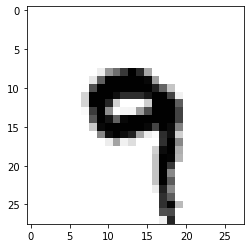

The Answer is 9


In [27]:
# Launch network on input data
predictions = best_model.predict(x_test)
random_item = randint(0,10000)
# Print one of the results of recognition
print(predictions[random_item])

# Print  class number,which was predicted by neural-Network 
answer = np.argmax(predictions[random_item])
plt.imshow(x_test[random_item].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print('The Answer is ' + str(answer))
